<h1><b>This Notebook is to experiment on the models before choosing the right one and make necessary changes from the assessments</b></h1>

<h2><b>1. Data Exploration and Loading</b></h2>

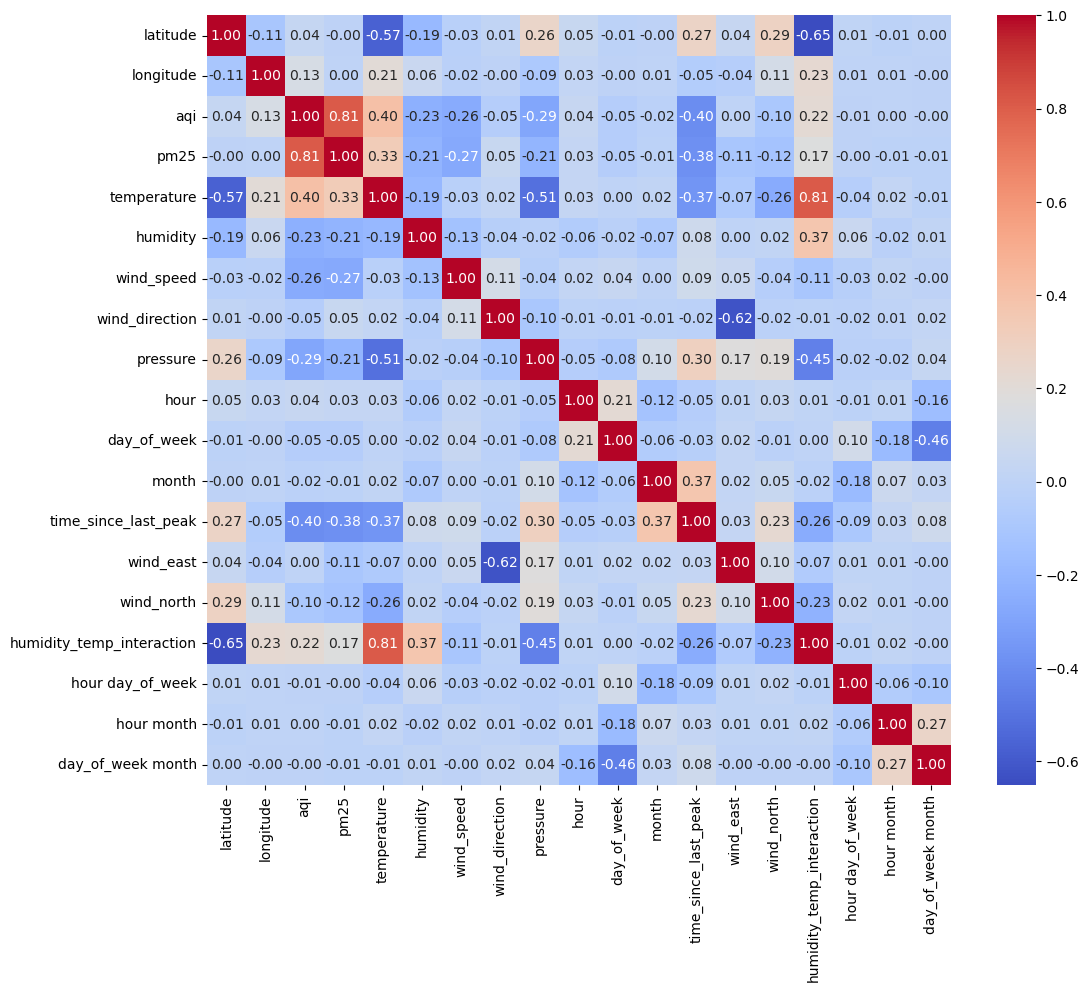

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processed/featured_data.csv')


# Correlation matrix visualization
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [17]:
# Check the first 5 rows
df.head()

,timestamp,latitude,longitude,city,state,country,aqi,main_pollutant,pm25,temperature,...,hour,day_of_week,month,time_since_last_peak,wind_east,wind_north,humidity_temp_interaction,hour day_of_week,hour month,day_of_week month
0,2025-03-23 03:00:00+00:00,-1.815201,2.036047,Auckland,Auckland,New Zealand,-1.518527,p2,-1.205092,0.554820,...,-1.174826,1.452782,-1.302713,-1.013839,-1.103669,-1.661525,0.794094,-1.706766,1.530461,-1.892558
1,2025-03-23 10:00:00+00:00,-1.815201,2.036047,Auckland,Auckland,New Zealand,-1.480954,p2,-1.205092,-0.116705,...,-0.145559,1.452782,-1.302713,-1.013839,-0.966756,-0.476779,0.408184,-0.211466,0.189622,-1.892558
2,2025-03-23 11:00:00+00:00,-1.815201,2.036047,Auckland,Auckland,New Zealand,-1.480954,p2,-1.205092,-0.116705,...,0.001479,1.452782,-1.302713,-1.013839,-0.816000,-0.395682,0.457189,0.002149,-0.001927,-1.892558
3,2025-03-23 12:00:00+00:00,-1.815201,2.036047,Auckland,Auckland,New Zealand,-1.593673,p2,-1.273768,-0.228626,...,0.148517,1.452782,-1.302713,-1.013839,-0.760534,0.005120,0.345398,0.215763,-0.193475,-1.892558
4,2025-03-23 13:00:00+00:00,-1.815201,2.036047,Auckland,Auckland,New Zealand,-1.593673,p2,-1.205092,-0.228626,...,0.295555,1.452782,-1.302713,-1.013839,-0.517387,0.245290,0.345398,0.429377,-0.385024,-1.892558


In [30]:
# Check the last 5 rows
df.tail()

,timestamp,latitude,longitude,city,state,country,aqi,main_pollutant,pm25,temperature,...,hour,day_of_week,month,time_since_last_peak,wind_east,wind_north,humidity_temp_interaction,hour day_of_week,hour month,day_of_week month
7153,2025-04-09 07:00:00+00:00,1.329537,-0.194716,Sjolyststranda,Oslo,Norway,-0.691920,p2,-0.587003,-1.235914,...,-0.586673,-0.319979,0.767629,0.991674,-0.378202,0.120795,-1.046634,0.187723,-0.450347,-0.245625
7154,2025-04-09 08:00:00+00:00,1.329537,-0.194716,Sjolyststranda,Oslo,Norway,-0.316190,p2,-0.449650,-1.235914,...,-0.439635,-0.319979,0.767629,0.991674,-0.324798,0.203606,-1.065011,0.140674,-0.337477,-0.245625
7155,2025-04-09 09:00:00+00:00,1.329537,-0.194716,Sjolyststranda,Oslo,Norway,-0.616774,p2,-0.243620,-1.012072,...,-0.292597,-0.319979,0.767629,0.991674,-0.035188,0.481178,-0.914935,0.093625,-0.224606,-0.245625
7156,2025-04-09 10:00:00+00:00,1.329537,-0.194716,Sjolyststranda,Oslo,Norway,-0.616774,p2,-0.312297,-0.900151,...,-0.145559,-0.319979,0.767629,0.991674,0.303228,0.585287,-0.872056,0.046576,-0.111735,-0.245625
7157,2025-04-09 11:00:00+00:00,1.329537,-0.194716,Sjolyststranda,Oslo,Norway,-0.616774,p2,-0.312297,-0.788230,...,0.001479,-0.319979,0.767629,0.991674,0.203340,0.113587,-1.208961,-0.000473,0.001135,-0.245625


<h2><b>2. Model Experimentation</b></h2>

In [24]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
# Prepare data
X = df.drop(['aqi', 'timestamp', 'latitude', 'longitude', 'city', 'state', 'country', 'main_pollutant'], axis=1)
y = df['aqi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [5, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_predictions = rf_best.predict(X_test)
rf_cv_scores = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [15]:
# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb_params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='neg_mean_absolute_error')
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_
gb_predictions = gb_best.predict(X_test)
gb_cv_scores = cross_val_score(gb_best, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [16]:
# Ridge Regression
ridge = Ridge(random_state=42)
ridge_params = {'alpha': [0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_absolute_error')
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_predictions = ridge_best.predict(X_test)
ridge_cv_scores = cross_val_score(ridge_best, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [32]:
# Evaluation
def evaluate_model(predictions, y_test, model_name, cv_scores):
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}, CV MAE: {np.mean(cv_scores):.2f}")

evaluate_model(rf_predictions, y_test, "Random Forest", rf_cv_scores)
evaluate_model(gb_predictions, y_test, "Gradient Boosting", gb_cv_scores)
evaluate_model(ridge_predictions, y_test, "Ridge Regression", ridge_cv_scores)

Random Forest MAE: 0.25, RMSE: 0.34, R2: 0.88, CV MAE: -0.26
Gradient Boosting MAE: 0.23, RMSE: 0.32, R2: 0.90, CV MAE: -0.25
Ridge Regression MAE: 0.45, RMSE: 0.54, R2: 0.71, CV MAE: -0.46


<h3><b>Interpretation:</b></h3>

1. MAE (Mean Absolute Error):
   - Represents the average absolute difference between the predicted and actual values.
   - Lower values are better.   
   - Gradient Boosting has the lowest MAE (0.23), indicating it has the most accurate predictions on average.
     

2. RMSE (Root Mean Squared Error):

    - Represents the square root of the average squared difference between predicted and actual values.
    - Lower values are better.
    - Gradient Boosting has the lowest RMSE (0.32), indicating it has the smallest average error magnitude.

3. R2 (R-squared):

    - Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.   
    - Higher values are better (closer to 1).  
    - Gradient Boosting has the highest R2 (0.90), indicating it explains the most variance in the AQI data.
      
4. CV MAE (Cross-Validation Mean Absolute Error):
    - Represents the average MAE obtained during cross-validation.
    - Lower values are better.
    - Negative values are shown because the scoring parameter in GridSearchCV uses negative values for minimization purposes.
    - Gradient boosting has the lowest CV MAE (-0.25), indicating that it generalizes well to unseen data.

<h3><b>Overall Assessment:</b></h3>

 - Gradient Boosting appears to be the best-performing model based on all evaluation metrics. It has the lowest MAE and RMSE, and the highest R2.
 - Random Forest performs slightly worse than Gradient Boosting but is still a strong model.
 - Ridge Regression performs significantly worse than the tree-based models, indicating that linear relationships might not capture the complexity of the data as well.

<h2><b>3. Feature Importance and Correlation Analysis</b> </h2>

In [34]:
# Feature importance analysis
feature_importance = gb_best.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                      Feature  Importance
0                        pm25    0.722621
9        time_since_last_peak    0.060077
12  humidity_temp_interaction    0.036527
5                    pressure    0.027010
11                 wind_north    0.024440
1                 temperature    0.021993
10                  wind_east    0.019155
4              wind_direction    0.017623
2                    humidity    0.014236
3                  wind_speed    0.013142
15          day_of_week month    0.009176
14                 hour month    0.009070
6                        hour    0.008612
13           hour day_of_week    0.007194
8                       month    0.004879
7                 day_of_week    0.004245


<h3><b>Model Development Strategy (Based on Previous Findings):</b></h3>

1. <b>Model Selection (Justification):</b>
   - <b>Gradient Boosting (Chosen Model):</b>
     - We found Gradient Boosting to consistently outperform other models (Random Forest, Ridge Regression) based on MAE, RMSE, and R2.
     - It excels at capturing non-linear relationships and interactions within the data, which is crucial for air quality prediction.
     - Gradient Boosting is robust to outliers, which we know are present in our dataset.
     - It offers good predictive accuracy and is well-suited for complex datasets.
       
2. <b>Feature Engineering (Justification):</b>
   - <b>Prioritize PM2.5 and Temperature:</b>
     - These features showed the strongest correlation with AQI and had the highest feature importance.
     - We'll ensure these features are accurately represented in our model.</br>
   - <b>Include Time Since Last Peak and Humidity-Temperature Interaction:</b>
     - These features also demonstrated significant predictive power.
     - They capture important temporal and environmental dynamics affecting AQI.
   - <b>Retain Weather-Related Features:</b>
     - While their individual correlations might be moderate, they contribute to capturing the overall weather influence on AQI.
   - <b>Polynomial Features (Interaction Terms):</b>
     - We'll retain the polynomial features we created (interactions of hour, day_of_week, and month). These can capture non-linear relationships that might not be apparent with linear models.
   - <b>Cautious Feature Reduction:</b>
     - We will not aggressively reduce features. Even low correlation features could be important.
       

3. <b>Hyperparameter Tuning (Justification):</b>
   - <b>GridSearchCV:</b>
     - We'll use GridSearchCV to fine-tune the Gradient Boosting model's hyperparameters.
     - We'll explore a wider range of hyperparameters based on our initial findings and domain knowledge.
     - If GridSearchCV is too computationally expensive or slow, we'll switch to RandomizedSearchCV for faster exploration.
   - <b>Key Hyperparameters:</b>
     - <b>n_estimators:</b> Controls the number of boosting stages.
     - <b>learning_rate:</b> Controls the contribution of each tree.
     - <b>max_depth:</b> Controls the complexity of individual trees.
     - <b>min_samples_split, min_samples_leaf:</b> Control overfitting.
     - <b>subsample:</b> Controls the fraction of samples used for fitting.
       

4. <b>Model Evaluation (Justification):</b>
   - <b>Cross-Validation:</b>
     - We'll use k-fold cross-validation to ensure robust model evaluation and assess generalization performance.
   - <b>Evaluation Metrics:</b>
     - MAE, RMSE, and R2 will be used to comprehensively evaluate model performance.
     - We'll focus on MAE as it's less sensitive to outliers than RMSE.
      

<h2><b>3. Refined Model Training and Analysis</b></h2>

In [56]:
# Gradient Boosting with GridSearchCV
gb = GradientBoostingRegressor(random_state=42)
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='neg_mean_absolute_error')
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_
gb_predictions = gb_best.predict(X_test)
gb_cv_scores = cross_val_score(gb_best, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [58]:
evaluate_model(gb_predictions, y_test, "Gradient Boosting", gb_cv_scores)

Gradient Boosting MAE: 0.23, RMSE: 0.32, R2: 0.90, CV MAE: -0.24
